# Deep inside: Autoencoders

This notebook is the complement of [this blog post](https://towardsdatascience.com/deep-inside-autoencoders-7e41f319999f)

4 types of autoencoders are described using the Keras framework and the MNIST dataset

1. Vanilla autoencoders
2. Multilayer autoencoder
3. Convolutional autoencoder
4. Regularized autoencoder

## Import the libraries

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

Using TensorFlow backend.


## Load the data

We don't need the labels as the autoencoders are unsupervised network

In [37]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

## Normalize the data

We want the pixels values between 0 and 1 instead of between 0 and 255

In [38]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Flatten the images for the Fully-Connected Networks

In [39]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
X_train.shape

(60000, 784)

___

# **Vanilla Autoencoder**

### Create the network

The first network is the most simple autoencoder. It has three layers : Input - encoded - decoded

In [16]:
input_size = 784
hidden_size = 64
output_size = 784

In [17]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

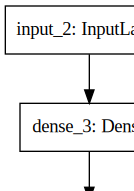

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

### Train

In [19]:
epochs = 15
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 28us/step - loss: 0.0437 - val_loss: 0.0220
Epoch 2/15
60000/60000 [==============================] - 2s 26us/step - loss: 0.0170 - val_loss: 0.0127
Epoch 3/15
60000/60000 [==============================] - 2s 27us/step - loss: 0.0106 - val_loss: 0.0085
Epoch 4/15
60000/60000 [==============================] - 2s 27us/step - loss: 0.0076 - val_loss: 0.0064
Epoch 5/15
60000/60000 [==============================] - 2s 29us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 6/15
60000/60000 [==============================] - 2s 29us/step - loss: 0.0053 - val_loss: 0.0049
Epoch 7/15
60000/60000 [==============================] - 2s 27us/step - loss: 0.0049 - val_loss: 0.0046
Epoch 8/15
60000/60000 [==============================] - 2s 27us/step - loss: 0.0046 - val_loss: 0.0044
Epoch 9/15
60000/60000 [==============================] - 2s 30us/step - loss: 0.0044 - val_loss: 0.0043
Epoch

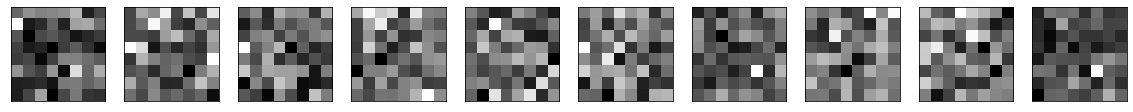

In [70]:
conv_encoder = Model(x, h)
encoded_imgs = conv_encoder.predict(X_test)
encoded_imgs_train = conv_encoder.predict(X_train)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(8, 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Predict on the test set

In [67]:
decoded_imgs = autoencoder.predict(X_test)
decoded_imgs_train = autoencoder.predict(X_train)

### Plot

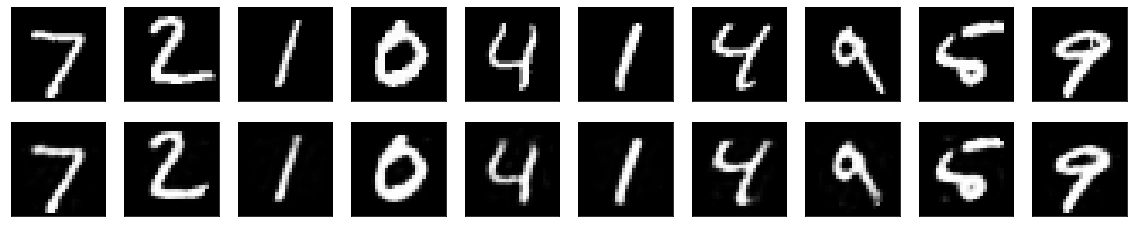

In [22]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

### Plot the losses

dict_keys(['val_loss', 'loss'])


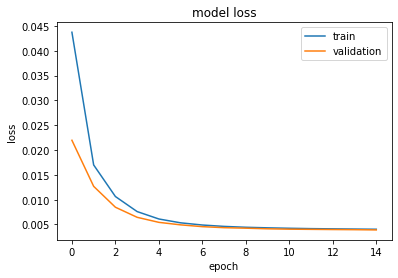

In [23]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Predicting

In [40]:
#one-hot encoding
from keras.models import Sequential

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [74]:
image_size = 784

model = Sequential()

model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


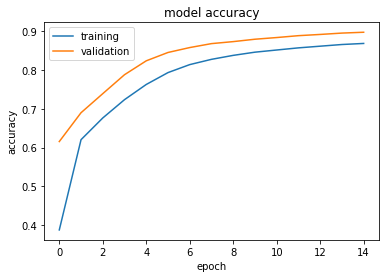

Test loss: 0.523
Test accuracy: 0.879


In [75]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128, epochs=15, verbose=False, validation_split=.1)
loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)
#print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

prediction: 2


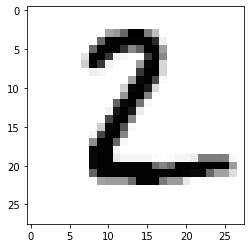

In [76]:
y_pred = model.predict(X_test)
plt.imshow(X_test[1].reshape(28, 28),cmap='Greys')
print(f'prediction: {y_pred[1].argmax()}')


In [77]:
model1 = Sequential()

model1.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model1.add(Dense(units=10, activation='softmax'))
model1.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_27 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


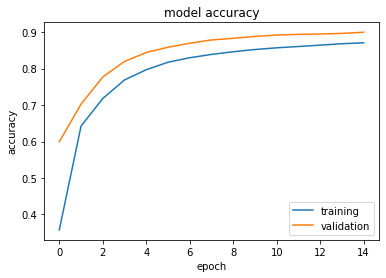

Test loss: 0.518
Test accuracy: 0.883


In [78]:
model1.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model1.fit(decoded_imgs_train, y_train, batch_size=128, epochs=15, verbose=False, validation_split=.1)
loss, accuracy  = model1.evaluate(decoded_imgs, y_test, verbose=False)
#print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [79]:
model_enc = Sequential()

model_enc.add(Dense(units=32, activation='sigmoid', input_shape=(64,)))
model_enc.add(Dense(units=10, activation='softmax'))
model_enc.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_29 (Dense)             (None, 10)                330       
Total params: 2,410
Trainable params: 2,410
Non-trainable params: 0
_________________________________________________________________


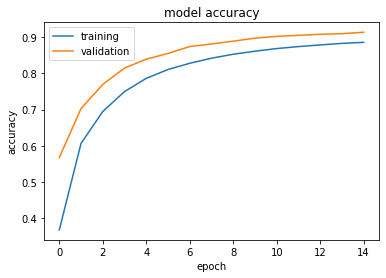

Test loss: 0.437
Test accuracy: 0.894


In [80]:
model_enc.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model_enc.fit(encoded_imgs_train, y_train, batch_size=128, epochs=15, verbose=False, validation_split=.1)
loss, accuracy  = model_enc.evaluate(encoded_imgs, y_test, verbose=False)
#print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# **Multilayer autoencoder**

### Create the network

We extend the idea of the first network to more layers

In [94]:
input_size = 784
hidden_size = 128
code_size = 64

x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(x)
h = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(h)
r = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(inputs=x, outputs=r)
encoder = Model(inputs=x, outputs=h)
autoencoder.compile(optimizer='adam', loss='mse')

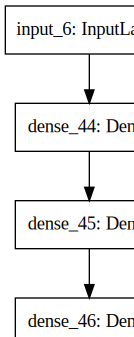

In [95]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

### Train the network

In [96]:
epochs = 15
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 3s 42us/step - loss: 0.0403 - val_loss: 0.0186
Epoch 2/15
60000/60000 [==============================] - 2s 38us/step - loss: 0.0154 - val_loss: 0.0124
Epoch 3/15
60000/60000 [==============================] - 2s 40us/step - loss: 0.0115 - val_loss: 0.0101
Epoch 4/15
60000/60000 [==============================] - 2s 38us/step - loss: 0.0096 - val_loss: 0.0089
Epoch 5/15
60000/60000 [==============================] - 2s 39us/step - loss: 0.0086 - val_loss: 0.0078
Epoch 6/15
60000/60000 [==============================] - 2s 38us/step - loss: 0.0078 - val_loss: 0.0072
Epoch 7/15
60000/60000 [==============================] - 2s 39us/step - loss: 0.0072 - val_loss: 0.0067
Epoch 8/15
60000/60000 [==============================] - 2s 38us/step - loss: 0.0068 - val_loss: 0.0066
Epoch 9/15
60000/60000 [==============================] - 2s 38us/step - loss: 0.0065 - val_loss: 0.0062
Epoch

### Predict on the test set

In [97]:
decoded_imgs = autoencoder.predict(X_test)
decoded_imgs_train = autoencoder.predict(X_train)

encoded_imgs = encoder.predict(X_test)
encoded_imgs_train = encoder.predict(X_train)

### Plot

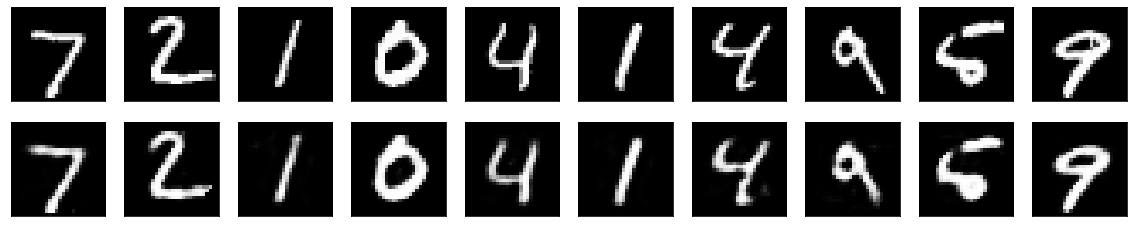

In [98]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

### Plot the losses

dict_keys(['val_loss', 'loss'])


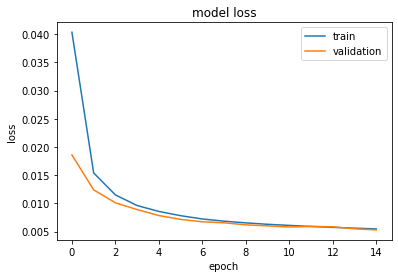

In [99]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

___

In [100]:
model_enc_mul = Sequential()

model_enc_mul.add(Dense(units=32, activation='sigmoid', input_shape=(64,)))
model_enc_mul.add(Dense(units=10, activation='softmax'))
model_enc_mul.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_49 (Dense)             (None, 10)                330       
Total params: 2,410
Trainable params: 2,410
Non-trainable params: 0
_________________________________________________________________


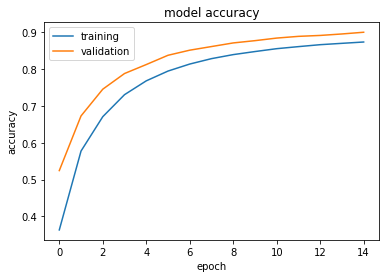

Test loss: 0.489
Test accuracy: 0.882


In [101]:
model_enc_mul.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model_enc_mul.fit(encoded_imgs_train, y_train, batch_size=128, epochs=15, verbose=False, validation_split=.1)
loss, accuracy  = model_enc_mul.evaluate(encoded_imgs, y_test, verbose=False)
#print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [103]:
model_dec_mul = Sequential()

model_dec_mul.add(Dense(units=32, activation='sigmoid', input_shape=(784,)))
model_dec_mul.add(Dense(units=10, activation='softmax'))
model_dec_mul.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_53 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


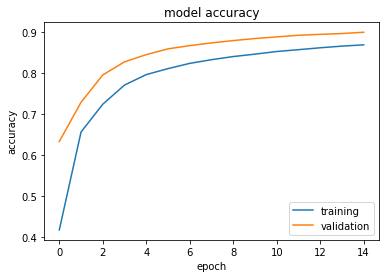

Test loss: 0.523
Test accuracy: 0.881


In [104]:
model_dec_mul.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model_dec_mul.fit(decoded_imgs_train, y_train, batch_size=128, epochs=15, verbose=False, validation_split=.1)
loss, accuracy  = model_dec_mul.evaluate(decoded_imgs, y_test, verbose=False)
#print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# **Convolutional autoencoder**

In [105]:
nb_classes = 10

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)
y_train[1]

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Create the network

This network does not take flattened vectors as an input but images

In [106]:
x = Input(shape=(28, 28,1)) 

# Encoder
conv1_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool2)
h = MaxPooling2D((2, 2), padding='same')(conv1_3)


# Decoder
conv2_1 = Conv2D(8, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(16, (3, 3), activation='relu')(up2)
up3 = UpSampling2D((2, 2))(conv2_3)
r = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up3)

autoencoder = Model(inputs=x, outputs=r)
Encoder = Model(x,h)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

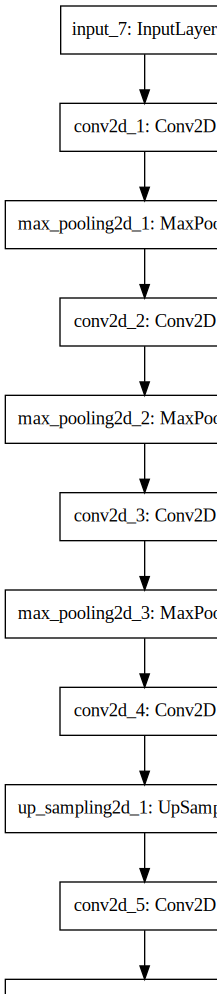

In [107]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

### Train

In [108]:
epochs = 7
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 64s 1ms/step - loss: 0.2149 - val_loss: 0.1589
Epoch 2/7
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1539 - val_loss: 0.1442
Epoch 3/7
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1406 - val_loss: 0.1324
Epoch 4/7
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1329 - val_loss: 0.1363
Epoch 5/7
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1274 - val_loss: 0.1244
Epoch 6/7
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1240 - val_loss: 0.1193
Epoch 7/7
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1214 - val_loss: 0.1160


In [115]:
decoded_imgs = autoencoder.predict(X_test)
decoded_imgs_train = autoencoder.predict(X_train)

encoded_imgs = Encoder.predict(X_test)
encoded_imgs_train = Encoder.predict(X_train)

encoded_imgs_train = encoded_imgs_train.reshape((len(encoded_imgs_train), np.prod(encoded_imgs_train.shape[1:])))
encoded_imgs = encoded_imgs.reshape((len(encoded_imgs), np.prod(encoded_imgs.shape[1:])))

In [124]:
decoded_imgs_train = decoded_imgs_train.reshape((len(decoded_imgs_train), np.prod(decoded_imgs_train.shape[1:])))
decoded_imgs = decoded_imgs.reshape((len(decoded_imgs), np.prod(decoded_imgs.shape[1:])))

### Plot

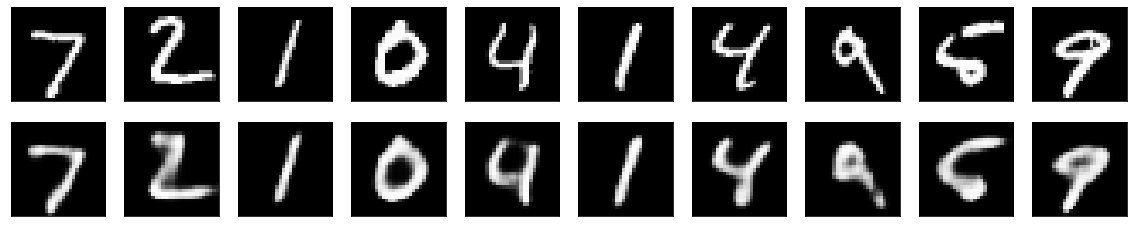

In [116]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

### Plot the losses

dict_keys(['val_loss', 'loss'])


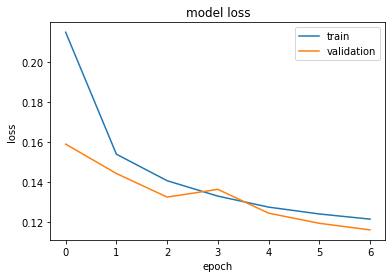

In [117]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

___

In [120]:
model_enc_conv = Sequential()

model_enc_conv.add(Dense(units=32, activation='sigmoid', input_shape=(128,)))
model_enc_conv.add(Dense(units=10, activation='softmax'))
model_enc_conv.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_59 (Dense)             (None, 10)                330       
Total params: 4,458
Trainable params: 4,458
Non-trainable params: 0
_________________________________________________________________


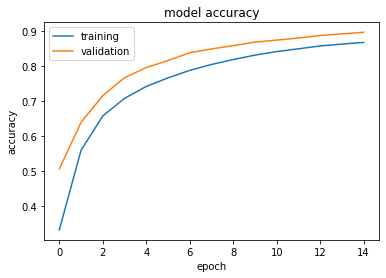

Test loss: 0.524
Test accuracy: 0.878


In [121]:
model_enc_conv.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model_enc_conv.fit(encoded_imgs_train, y_train, batch_size=128, epochs=15, verbose=False, validation_split=.1)
loss, accuracy  = model_enc_conv.evaluate(encoded_imgs, y_test, verbose=False)
#print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [125]:
model_dec_conv = Sequential()

model_dec_conv.add(Dense(units=32, activation='sigmoid', input_shape=(784,)))
model_dec_conv.add(Dense(units=10, activation='softmax'))
model_dec_conv.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_63 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


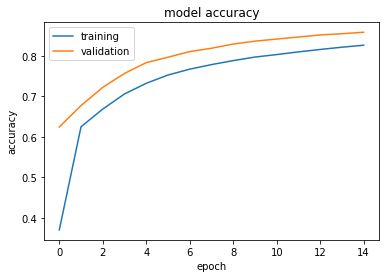

Test loss: 0.614
Test accuracy: 0.838


In [126]:
model_dec_conv.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model_dec_conv.fit(decoded_imgs_train, y_train, batch_size=128, epochs=15, verbose=False, validation_split=.1)
loss, accuracy  = model_dec_conv.evaluate(decoded_imgs, y_test, verbose=False)
#print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# **Regularized autoencoder**

Two types of regularization are described : 
- Sparse autoencoder
- Denoising autoencoder

## 1. Sparse autoencoder

### Create the network

In [127]:
input_size = 784
hidden_size = 64
output_size = 784
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [139]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu', activity_regularizer=regularizers.l1(0.001))(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

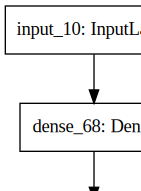

In [140]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

In [141]:
epochs = 40
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 2s 29us/step - loss: 0.2079 - val_loss: 0.1633
Epoch 2/40
60000/60000 [==============================] - 1s 25us/step - loss: 0.1416 - val_loss: 0.1242
Epoch 3/40
60000/60000 [==============================] - 1s 25us/step - loss: 0.1120 - val_loss: 0.1025
Epoch 4/40
60000/60000 [==============================] - 2s 26us/step - loss: 0.0954 - val_loss: 0.0901
Epoch 5/40
60000/60000 [==============================] - 1s 25us/step - loss: 0.0857 - val_loss: 0.0826
Epoch 6/40
60000/60000 [==============================] - 2s 26us/step - loss: 0.0798 - val_loss: 0.0780
Epoch 7/40
60000/60000 [==============================] - 2s 30us/step - loss: 0.0760 - val_loss: 0.0749
Epoch 8/40
60000/60000 [==============================] - 2s 27us/step - loss: 0.0735 - val_loss: 0.0729
Epoch 9/40
60000/60000 [==============================] - 1s 25us/step - loss: 0.0718 - val_loss: 0.0714
Epoch

### Predict on the test set

In [142]:
decoded_imgs = autoencoder.predict(X_test)
decoded_imgs_train = autoencoder.predict(X_train)

encoded_imgs = encoder.predict(X_test)
encoded_imgs_train = encoder.predict(X_train)

### Plot

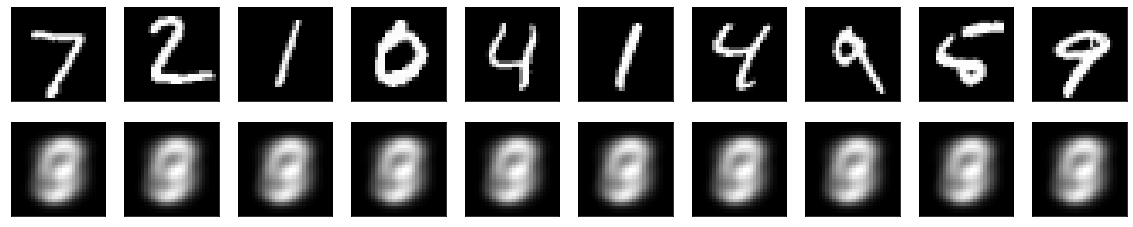

In [143]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

### Plot the losses

dict_keys(['val_loss', 'loss'])


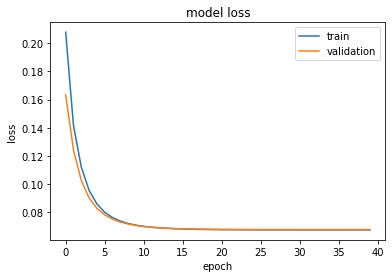

In [144]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## 2. Denoising autoencoder

In [145]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

### Create noisy data

In [146]:
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

### Create the network

In [148]:
x = Input(shape=(28, 28, 1))

# Encoder
conv1_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
h = MaxPooling2D((2, 2), padding='same')(conv1_2)


# Decoder
conv2_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
r = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2)

autoencoder = Model(inputs=x, outputs=r)
Encoder = Model(x,h)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

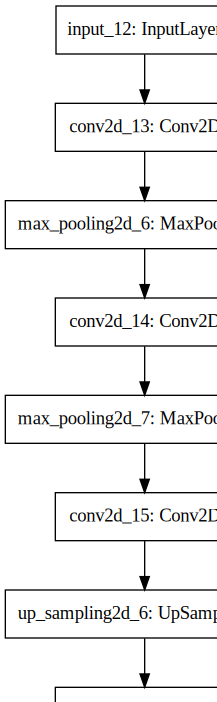

In [149]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

### Train the network

In [150]:
epochs = 7
batch_size = 128

history = autoencoder.fit(X_train_noisy, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test_noisy, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 113s 2ms/step - loss: 0.1754 - val_loss: 0.1218
Epoch 2/7
60000/60000 [==============================] - 113s 2ms/step - loss: 0.1176 - val_loss: 0.1130
Epoch 3/7
60000/60000 [==============================] - 110s 2ms/step - loss: 0.1112 - val_loss: 0.1085
Epoch 4/7
60000/60000 [==============================] - 109s 2ms/step - loss: 0.1078 - val_loss: 0.1072
Epoch 5/7
60000/60000 [==============================] - 110s 2ms/step - loss: 0.1055 - val_loss: 0.1034
Epoch 6/7
60000/60000 [==============================] - 109s 2ms/step - loss: 0.1043 - val_loss: 0.1021
Epoch 7/7
60000/60000 [==============================] - 109s 2ms/step - loss: 0.1030 - val_loss: 0.1039


In [160]:
decoded_imgs = autoencoder.predict(X_test_noisy)
decoded_imgs_train = autoencoder.predict(X_train_noisy)

encoded_imgs = Encoder.predict(X_test_noisy)
encoded_imgs_train = Encoder.predict(X_train_noisy)

encoded_imgs_train = encoded_imgs_train.reshape((len(encoded_imgs_train), np.prod(encoded_imgs_train.shape[1:])))
encoded_imgs = encoded_imgs.reshape((len(encoded_imgs), np.prod(encoded_imgs.shape[1:])))

decoded_imgs_train = decoded_imgs_train.reshape((len(decoded_imgs_train), np.prod(decoded_imgs_train.shape[1:])))
decoded_imgs = decoded_imgs.reshape((len(decoded_imgs), np.prod(decoded_imgs.shape[1:])))

(10000, 1568)

### Plot

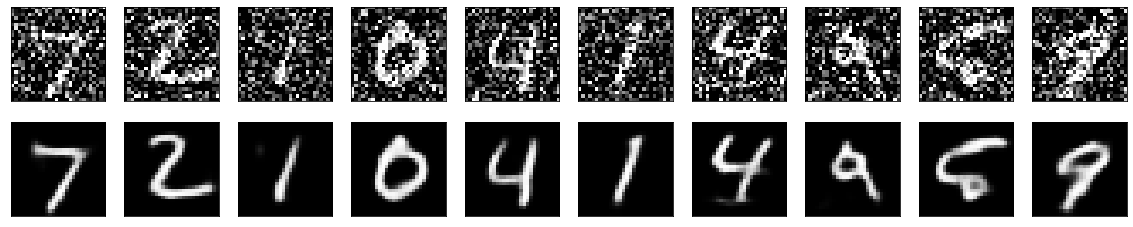

In [161]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

### Plot the losses

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


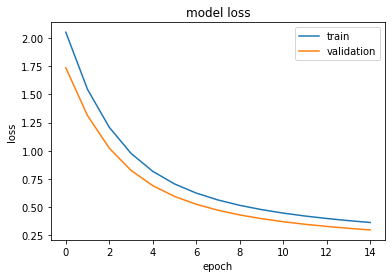

In [162]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

___

In [163]:
model_enc_de = Sequential()

model_enc_de.add(Dense(units=32, activation='sigmoid', input_shape=(1568,)))
model_enc_de.add(Dense(units=10, activation='softmax'))
model_enc_de.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 32)                50208     
_________________________________________________________________
dense_75 (Dense)             (None, 10)                330       
Total params: 50,538
Trainable params: 50,538
Non-trainable params: 0
_________________________________________________________________


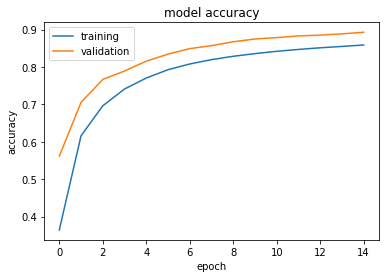

Test loss: 0.516
Test accuracy: 0.874


In [164]:
model_enc_de.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model_enc_de.fit(encoded_imgs_train, y_train, batch_size=128, epochs=15, verbose=False, validation_split=.1)
loss, accuracy  = model_enc_de.evaluate(encoded_imgs, y_test, verbose=False)
#print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [165]:
model_dec_de = Sequential()

model_dec_de.add(Dense(units=32, activation='sigmoid', input_shape=(784,)))
model_dec_de.add(Dense(units=10, activation='softmax'))
model_dec_de.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_77 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


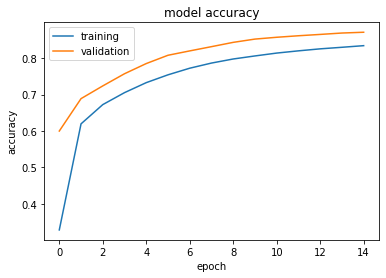

Test loss: 0.621
Test accuracy: 0.847


In [166]:
model_dec_de.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model_dec_de.fit(decoded_imgs_train, y_train, batch_size=128, epochs=15, verbose=False, validation_split=.1)
loss, accuracy  = model_dec_de.evaluate(decoded_imgs, y_test, verbose=False)
#print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

---